# CVAE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

import base
import cvae
import importlib
importlib.reload(cvae)

<module 'cvae' from '../src\\cvae.py'>

## Create the data

In [2]:
data, conditions = make_circles(n_samples=10000, noise=0.05, factor=0.5)

# We normalise the data to [0, 1]^2
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

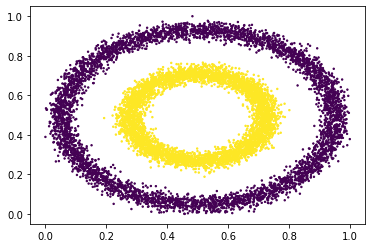

In [3]:
# Plot dataset
plt.scatter(*data.T, c=conditions, s=2)
plt.show()

# Train the CVAE




The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


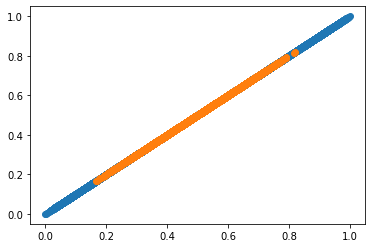

0 0.13655843


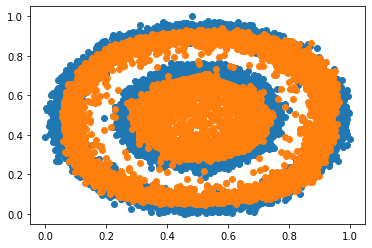

1000 0.046318855


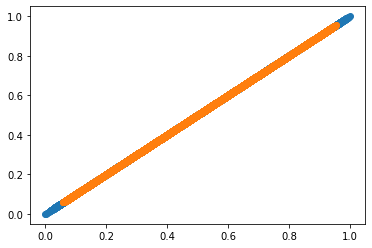

2000 0.04563361


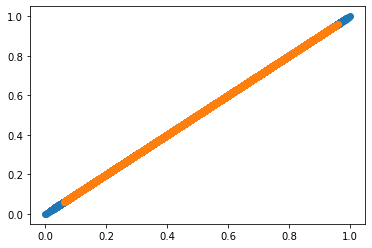

3000 0.04612061


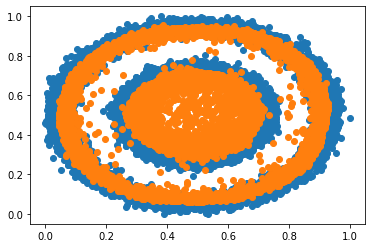

4000 0.045935627


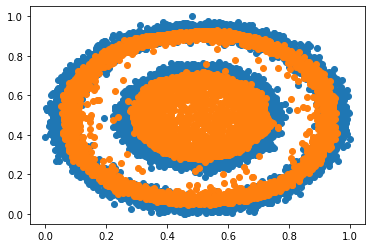

5000 0.046069704


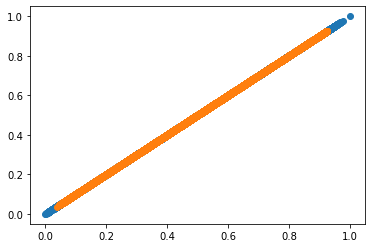

6000 0.045976833


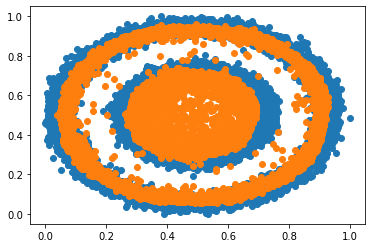

7000 0.045906723


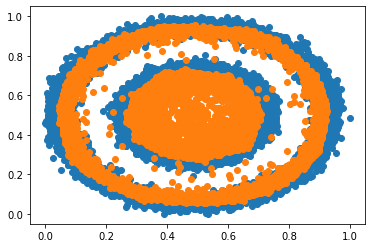

8000 0.045656025


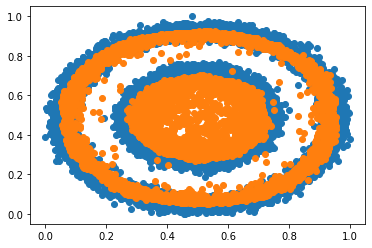

9000 0.04573428



In [4]:
generator = cvae.CVAE(n_latent=4, alpha=0.02)
generator.train(data, data_cond=conditions.reshape(-1, 1),
                n_epochs=10000)

# Generate samples

In [5]:
outer_circle_generated = generator.generate((0,), n_samples=1000)
inner_circle_generated = generator.generate((1,), n_samples=1000)

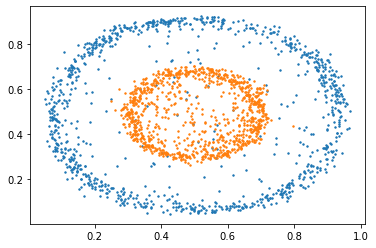

In [10]:
plt.scatter(*outer_circle_generated.T, s=2)
plt.scatter(*inner_circle_generated.T, s=2)
plt.show()

In [7]:
data.min()

0.0